In [ ]:
!pip install tpot

     |████████████████████████████████| 87 kB 3.9 MB/s 
     |████████████████████████████████| 160 kB 21.1 MB/s 
     |████████████████████████████████| 166.7 MB 14 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11955 sha256=1029577a1c0aebc9d039895c09882da398f87d1ef642651020eef50ff8c7c224
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
from sklearn.preprocessing import scale
from tpot import TPOTClassifier
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 13

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
def read_data(file_path):
    data = pd.read_csv(file_path,header = 0)
    data["date"] = pd.to_datetime(data["date"])
    data["year"] = data["date"].dt.year
    data["month"] = data["date"].dt.month
    data["day"] = data["date"].dt.day
    data["hour"] = data["date"].dt.hour
    data["minute"] = data["date"].dt.minute
    data["second"] = data["date"].dt.second
    data['weekday'] = data[['date']].apply(lambda x: dt.datetime.strftime(x['date'], '%A'), axis=1)
    return data

def plot_signal(ax, x, y, title):
    ax.plot(x, y)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%A, %b %d'))
    ax.set_xlim([min(x) , max(x)])
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.grid(True)

In [ ]:
tr_data = read_data("datatraining.txt")
ts_one_data = read_data("datatest.txt")
ts_two_data = read_data("datatest2.txt")

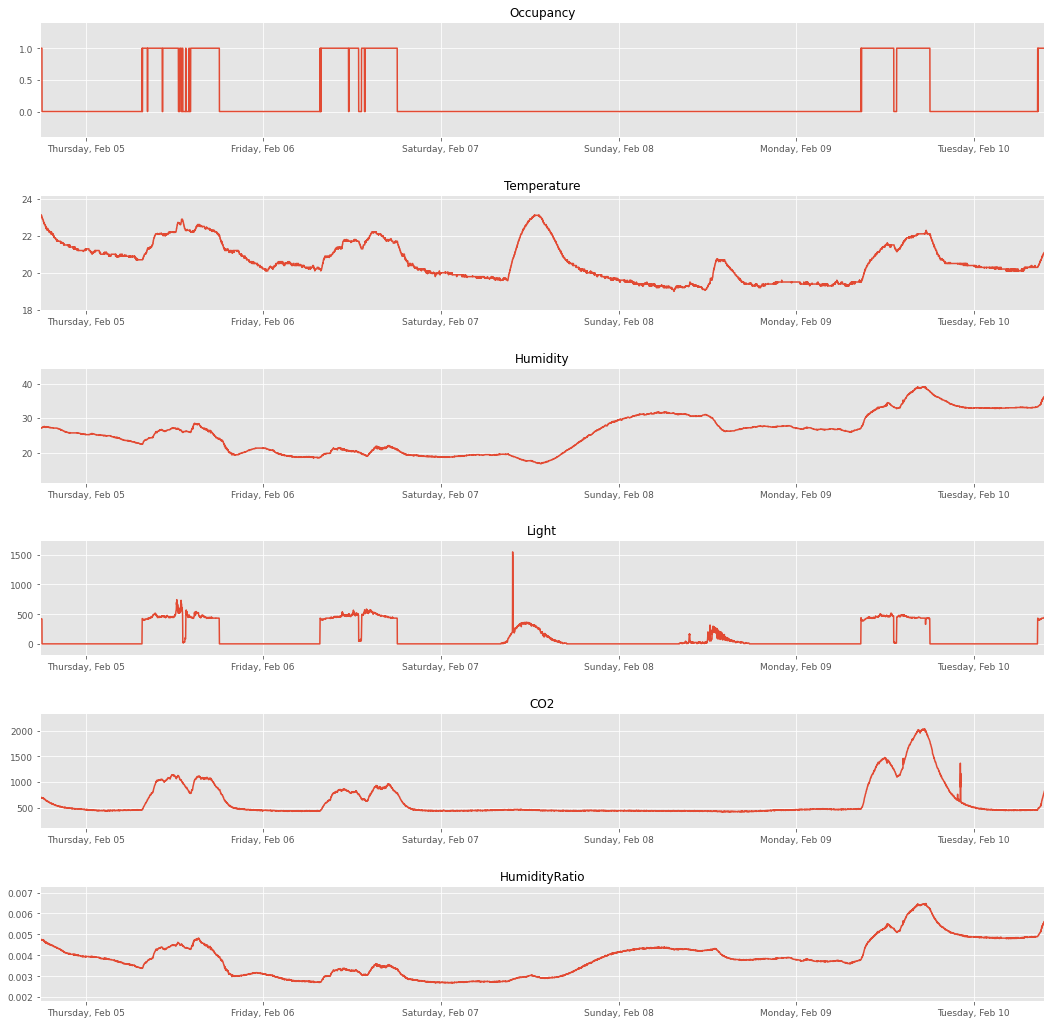

In [ ]:
subset_features = tr_data[["Occupancy","Temperature","Humidity","Light","CO2","HumidityRatio"]]

fig, axs = plt.subplots(nrows = len(subset_features.columns.values), figsize=(18, 18))
for i in range(0, len(subset_features.columns.values)):
    plot_signal(axs[i],tr_data["date"], 
                subset_features[subset_features.columns.values[i]],subset_features.columns.values[i])
plt.subplots_adjust(hspace=0.5)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

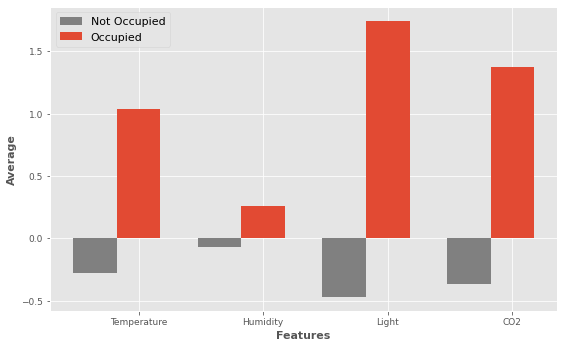

In [ ]:
scaled_data =  tr_data[["Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"]]

scaled_data.loc[:,"Temperature"] = scale(scaled_data["Temperature"])
scaled_data.loc[:,"Humidity"] = scale(scaled_data["Humidity"])
scaled_data.loc[:,"Light"] = scale(scaled_data["Light"])
scaled_data.loc[:,"CO2"] = scale(scaled_data["CO2"])


summary_occupancy = scaled_data[["Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"]].\
        groupby(["Occupancy"],as_index = False).mean()
    
n_groups = 4
fig, ax = plt.subplots(figsize = (8,5))
index = np.arange(n_groups)
bar_width = 0.35
    
rects_no = plt.bar(index,np.asarray(summary_occupancy[["Temperature","Humidity","Light","CO2"]])[0], 
                 bar_width,
                 color="grey",
                 label="Not Occupied")
 
    
rects_o = plt.bar(index + bar_width,np.asarray(summary_occupancy[["Temperature","Humidity","Light","CO2"]])[1], 
                 bar_width,
                 label="Occupied")

plt.xlabel("Features")
plt.ylabel("Average")
plt.xticks(index + bar_width, ("Temperature", "Humidity","Light", "CO2")) 
plt.legend(loc = "upper left")
 
plt.tight_layout()
plt.show()

In [ ]:
tr_features = tr_data[["Temperature","Humidity","Light","CO2","HumidityRatio"]]
tr_labels = tr_data["Occupancy"]

ts_one_features = ts_one_data[["Temperature","Humidity","Light","CO2","HumidityRatio"]]
ts_one_labels = ts_one_data["Occupancy"]

ts_two_features = ts_two_data[["Temperature","Humidity","Light","CO2","HumidityRatio"]]
ts_two_labels = ts_two_data["Occupancy"]

In [ ]:
tpot = TPOTClassifier(generations = 1 , population_size = 5, verbosity = 2)
tpot.fit(tr_features, tr_labels)

print("Test set one:")
print(tpot.score(ts_one_features, ts_one_labels))

print("Test set two:")
print(tpot.score(ts_two_features, ts_two_labels))

tpot.export('od_pipeline.py')


Generation 1 - Current best internal CV score: 0.975321604879616

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.6500000000000001, min_samples_leaf=11, min_samples_split=5, n_estimators=100)
Test set one:
0.9714821763602252
Test set two:
0.9851312551271534
